<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)


<b>Ответ студента №1</b>
    
Цель исследования заключется в построении наилучшей с точки зрения меры F1 модели класификации "поведения" клиентов Банка, что позволит прогнозировать вероятность ухода клента Банка.
    
План работы:

1.1 Получение и подготовка данных:
- загрузить данные
- получить первое представление о данных: типы переменных, отсутствующие значения, повторы, аномалии
- предобработка данных: восстановление пропусков, изменение типов переменных, обработка скрытых дубликатов и повторов, обработка ошибок в данных
2. Исследование задачи
- подготовка данных для использования в моделях: выделение категориальных переменных в отдельные dummy переменные, нормализация числовых переменных,
- разбиение данных на тренировочный, валидационный и тестовые наборы
- построение моделей: дерева решений, случайного леса и логистической регрессии - на основе несбалансированных данных
- обучение моделей на тренировочных данных и определение наилучших моделей на основе валидационных данных
3. Балансировка даных и построение на их основе тренировочных данных указанных выше моделей классификации. Определение наилучших моделей на основе валидационных даных. 
4. Проверка наилучших моделей на тестовой выборке
5. Вывод об итогах исследования
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.float_format', '{:,.2f}'.format)

import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Подготовка данных

In [2]:
data = pd.read_csv('/datasets/Churn.csv')

display(data.info())
display(data.head())
display(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


None

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.00,0.00,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1.00,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8.00,"159,660.80",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1.00,0.00,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2.00,"125,510.82",1,1,1,"79,084.10",0


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,"10,000.00","10,000.00","10,000.00","10,000.00","9,091.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,"5,000.50","15,690,940.57",650.53,38.92,5.00,"76,485.89",1.53,0.71,0.52,"100,090.24",0.20
std,"2,886.90","71,936.19",96.65,10.49,2.89,"62,397.41",0.58,0.46,0.50,"57,510.49",0.40
min,1.00,"15,565,701.00",350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,"2,500.75","15,628,528.25",584.00,32.00,2.00,0.00,1.00,0.00,0.00,"51,002.11",0.00
50%,"5,000.50","15,690,738.00",652.00,37.00,5.00,"97,198.54",1.00,1.00,1.00,"100,193.91",0.00
75%,"7,500.25","15,753,233.75",718.00,44.00,7.00,"127,644.24",2.00,1.00,1.00,"149,388.25",0.00
max,"10,000.00","15,815,690.00",850.00,92.00,10.00,"250,898.09",4.00,1.00,1.00,"199,992.48",1.00



<b>Ответ студента №1</b>
    
Выборка состоит из 10000 записей, каждая из которых характеризуется 14 параметрами. В графе со сроком обслуживания клиента в Банке остутствует 981 запись. Переменные названы корректно.

In [3]:
print(f'Количество явных строк дубликатов: {data.duplicated().sum()}')
display(data.loc[data.duplicated()])

Количество явных строк дубликатов: 0


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited



<b>Ответ студента №1</b>

Явные дубликаты в данных отсутстуют. 
    
Проведем детальный анализ параметров.

,CustomerId
Exited,
0,7963
1,2037


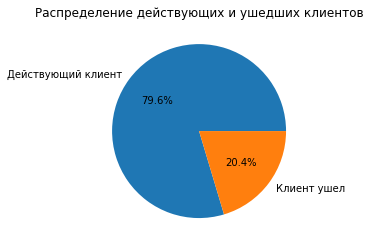

In [4]:
#соотношение ушедших и оставшихся клиентов
data_dimension=data["Exited"].count()

display(data.pivot_table(index="Exited", values="CustomerId", aggfunc="count"))
plt.pie(data.pivot_table(index="Exited", values="CustomerId", 
                               aggfunc=lambda g: g.count()/data_dimension)["CustomerId"], 
       labels = ["Действующий клиент", "Клиент ушел"], autopct='%.1f%%');
plt.title("Распределение действующих и ушедших клиентов")
plt.show();


<b>Ответ студента №1</b>

Зависимая переменная принимает два значения: действующий клиент, клиент ушел. Действующих клиентов примерно в 4 раза больше ушедших - таким образом данные несбалансированны и это потребуется учесть при построении моделей.

In [5]:
display(f'Количество уникальных строк данных: {len(data["RowNumber"].sort_values().unique())}')

display(f'Количество уникальных ID клиентов: {len(data["CustomerId"].sort_values().unique())}')

display(f'Представленные в базе гендеры: {data["Gender"].sort_values().unique()}')

display("Возраст клиентов:")
display(data["Age"].sort_values().unique())

display(f'Индикатор активности клиента: {data["IsActiveMember"].sort_values().unique()}')

display(f'Кол-во продуктов, используемых клиентами: {data["NumOfProducts"].sort_values().unique()}')

display(f'Индиктор наличия кредитной карты у клиента: {data["HasCrCard"].sort_values().unique()}')

display(f'Срок в течение которого клиент обслуживается в Банке: {data["Tenure"].sort_values().unique()}')

display(f'Страна проживания клиента Банка: {data["Geography"].sort_values().unique()}')


'Количество уникальных строк данных: 10000'

'Количество уникальных ID клиентов: 10000'

"Представленные в базе гендеры: ['Female' 'Male']"

'Возраст клиентов:'

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       88, 92])

'Индикатор активности клиента: [0 1]'

'Кол-во продуктов, используемых клиентами: [1 2 3 4]'

'Индиктор наличия кредитной карты у клиента: [0 1]'

'Срок в течение которого клиент обслуживается в Банке: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. nan]'

"Страна проживания клиента Банка: ['France' 'Germany' 'Spain']"


<b>Ответ студента №1</b>
    
- Кол-во уникальных строк в базе - 10000 шт. - переменная не может оказывать влияние на вероятность ухода клиента, подлежит исключению при построении моделей
- Кол-во уникальных клиентов в базе - 10000 шт. - переменная не может оказывать влияние на вероятность ухода клиента, подлежит исключению при построении моделей
- В базе представлены два пола - мужчины и женщины - будут преобразованы в один отдельный dummy ряд
- Возраст клиентов находится в диапазоне от 18 до 92 лет
- Два типа активности клиентов
- Клиенты имеют от 1 до 4 продуктов - будут преобразованы в 3 отдельных dummy ряда
- Индикатор наличия кредитной карты - есть или нет
- В Банке обслуживаются или обслужвались клиенты от 0 до 10 лет, также есть пропуски
- Клинеты проживают в трех странах: Франции, Германии и Испании - будут преобразованы в 2 отдельные dummy ряда

In [6]:
display(data.pivot_table(index="Gender", columns="Exited", values="CustomerId", aggfunc="count"))


Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898



<b>Ответ студента №1</b>
    
Клиенты Банка несбалансированы по полу - мужчин-клиентов больше, чем женщин. При этом из ушедших клиентов женщин около 25%, в то время как мужчин - около 16%, таким образом недовольных женщин-клинетов больше

In [7]:
display(data.pivot_table(index="Geography", columns="Exited", values="CustomerId", aggfunc="count"))

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413



<b>Ответ студента №1</b>
    
Преимущественно клиентами банка являются граждане Франиции - 53%. Наибольшая доля клиентов, покинувших Банк 32% - имеют гражданство Германии.

In [8]:
display(data.pivot_table(index="Tenure", columns="Exited", values="CustomerId", aggfunc="count"))
display(data.loc[data["Tenure"].isna()==True].pivot_table(index="Gender",
                                columns="Exited", values="CustomerId", aggfunc="count"))

Exited,0,1
Tenure,,
0.00,292,90
1.00,739,213
2.00,765,185
3.00,730,198
4.00,701,184
5.00,740,187
6.00,704,177
7.00,765,160
8.00,759,174


Exited,0,1
Gender,,
Female,328,98
Male,398,85



<b>Ответ студента №1</b>

За исключением первого и 10-го года обслуживания - клиенты равномерно распределены по возрасту обслуживания в банке, какой либо тенденции по приходу клиентов и их уходу не прослеживается.

Структуры гендеров у клиентов с отсутствующими данными о сроке обслуживания в Банке соответствует общей гендерной структуре клиентов, таким образом исключение указаных записей не должно сказаться на репрезентативности выборки. 

In [9]:
display(data.pivot_table(index="IsActiveMember", columns="Exited", values="CustomerId", aggfunc="count"))

Exited,0,1
IsActiveMember,,
0,3547,1302
1,4416,735



<b>Ответ студента №1</b>

Из Банка уходили преимущественно неактивны клиенты.    

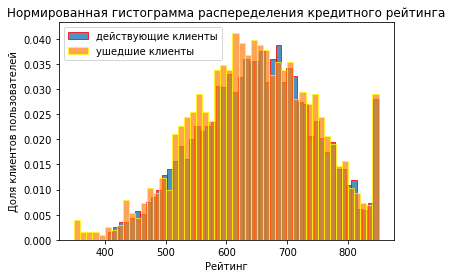

In [10]:
weights_credit_score_not_exired = np.ones_like(data.loc[data["Exited"]==0,"CreditScore"]) / len(data.loc[data["Exited"]==0,"CreditScore"])
weights_credit_score_exited = np.ones_like(data.loc[data["Exited"]==1,"CreditScore"]) / len(data.loc[data["Exited"]==1,"CreditScore"])


plt.hist(data.loc[data["Exited"]==0,"CreditScore"], 
         label="действующие клиенты",alpha=0.8, edgecolor='red', bins=int(50), weights=weights_credit_score_not_exired)
plt.hist(data.loc[data["Exited"]==1,"CreditScore"],
         label="ушедшие клиенты",alpha=0.7, edgecolor='yellow', bins=int(50), weights=weights_credit_score_exited)
plt.legend()
plt.title('Нормированная гистограмма распеределения кредитного рейтинга')
plt.xlabel('Рейтинг')
plt.ylabel('Доля клиентов пользователей')
plt.show()


<b>Ответ студента №1</b>

- распределение ушедших клеинтов характеризуется левым тяжелым хвостом, то есть ушли клиенты с рейтингом ниже 400 - среди действующих клиентов таких нет
- аномально выглядит доля клиентов, как текущих так и ушедших, с рейтингом, превышающим 850  

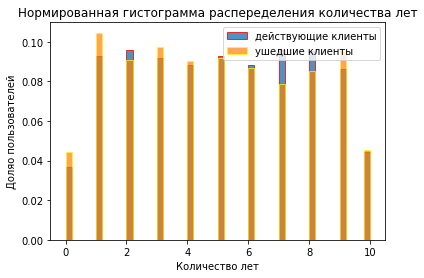

In [11]:
weights_tenure_not_exired = np.ones_like(data.loc[data["Exited"]==0,"Tenure"]) / len(data.loc[data["Exited"]==0,"Tenure"])
weights_tenure_exited = np.ones_like(data.loc[data["Exited"]==1,"Tenure"]) / len(data.loc[data["Exited"]==1,"Tenure"])


plt.hist(data.loc[data["Exited"]==0,"Tenure"], 
         label="действующие клиенты",alpha=0.8, edgecolor='red', bins=int(50), weights=weights_tenure_not_exired)
plt.hist(data.loc[data["Exited"]==1,"Tenure"],
         label="ушедшие клиенты",alpha=0.7, edgecolor='yellow', bins=int(50), weights=weights_tenure_exited)
plt.legend()
plt.title('Нормированная гистограмма распеределения количества лет')
plt.xlabel('Количество лет')
plt.ylabel('Доляо пользователей')
plt.show()


<b>Ответ студента №1</b>

- структура бывших и текущих клиентов по сроку обслуживания в Банке преимущественно схожа  

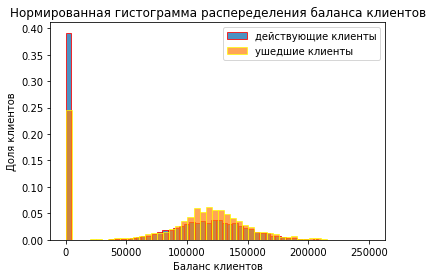

In [12]:
weights_balance_not_exired = np.ones_like(data.loc[data["Exited"]==0,"Balance"]) / len(data.loc[data["Exited"]==0,"Balance"])
weights_balance_exited = np.ones_like(data.loc[data["Exited"]==1,"Balance"]) / len(data.loc[data["Exited"]==1,"Balance"])


plt.hist(data.loc[data["Exited"]==0,"Balance"], 
         label="действующие клиенты",alpha=0.8, edgecolor='red', bins=int(50), weights=weights_balance_not_exired)
plt.hist(data.loc[data["Exited"]==1,"Balance"],
         label="ушедшие клиенты",alpha=0.7, edgecolor='yellow', bins=int(50), weights=weights_balance_exited)
plt.legend()
plt.title('Нормированная гистограмма распеределения баланса клиентов')
plt.xlabel('Баланс клиентов')
plt.ylabel('Доля клиентов')
plt.show()


<b>Ответ студента №1</b>

Распределение структур балансов бывших и текущих клиентов имеет два важных отличия:
1. доля ушедших клинетов, имевших средний баланс, превышает долю действующих клеинтов
2. доля действующих клеинтов с нулевым балансом римерно в 1,5 раза больше, чем ушедших

Эти особенности могут негативнвым образом отразися на показателях Банка

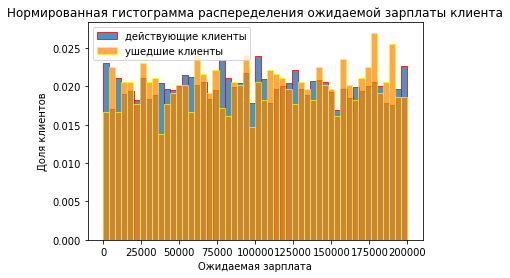

In [13]:
weights_salary_not_exired = np.ones_like(data.loc[data["Exited"]==0,"EstimatedSalary"]) / len(data.loc[data["Exited"]==0,"EstimatedSalary"])
weights_salary_exited = np.ones_like(data.loc[data["Exited"]==1,"EstimatedSalary"]) / len(data.loc[data["Exited"]==1,"EstimatedSalary"])


plt.hist(data.loc[data["Exited"]==0,"EstimatedSalary"], 
         label="действующие клиенты",alpha=0.8, edgecolor='red', bins=int(50), weights=weights_salary_not_exired)
plt.hist(data.loc[data["Exited"]==1,"EstimatedSalary"],
         label="ушедшие клиенты",alpha=0.7, edgecolor='yellow', bins=int(50), weights=weights_salary_exited)
plt.legend()
plt.title('Нормированная гистограмма распеределения ожидаемой зарплаты клиента')
plt.xlabel('Ожидаемая зарплата')
plt.ylabel('Доля клиентов')
plt.show()


<b>Ответ студента №1</b>

- структура ожидаемых зарплат бывших и текущих клиентов Банка преимущественно схожа  

In [14]:
data=data.loc[data["Tenure"].isna()==False].reset_index(drop=True)
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9091 entries, 0 to 9090
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9091 non-null   int64  
 1   CustomerId       9091 non-null   int64  
 2   Surname          9091 non-null   object 
 3   CreditScore      9091 non-null   int64  
 4   Geography        9091 non-null   object 
 5   Gender           9091 non-null   object 
 6   Age              9091 non-null   int64  
 7   Tenure           9091 non-null   float64
 8   Balance          9091 non-null   float64
 9   NumOfProducts    9091 non-null   int64  
 10  HasCrCard        9091 non-null   int64  
 11  IsActiveMember   9091 non-null   int64  
 12  EstimatedSalary  9091 non-null   float64
 13  Exited           9091 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 994.5+ KB


None


<b>Ответ студента №1</b>

Исключим из выборки клиентов с отсутствующим сроком обслуживания в Банке

In [15]:
print(f'Количество явных строк дубликатов: {data.duplicated().sum()}')
display(data.loc[data.duplicated()])

Количество явных строк дубликатов: 0


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


,CustomerId
Exited,
0,7237
1,1854


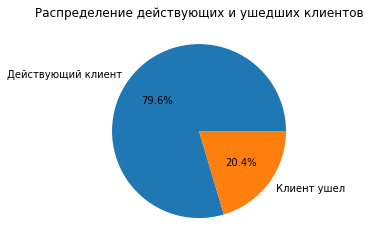

In [16]:
display(data.pivot_table(index="Exited", values="CustomerId", aggfunc="count"))
data_dimension=data["Exited"].count()
plt.pie(data.pivot_table(index="Exited", values="CustomerId", 
                               aggfunc=lambda g: g.count()/data_dimension)["CustomerId"], 
       labels = ["Действующий клиент", "Клиент ушел"], autopct='%.1f%%');
plt.title("Распределение действующих и ушедших клиентов")
plt.show();


<b>Ответ студента №1</b>
    
Исключение клиентов с отсутствующим сроком обслуживания в Банке не сказалось на структуре действующих и ушедших клиентов. 


<b>Ответ студента №1. Вывод по разделу 1</b>
    
Выборка клинетов Банка состоит из 10000 записей, каждая из которых характеризуется 14 параметрами. Переменные названы корректно. Явные дубликаты в данных отсутстуют. Действующих клиентов примерно в 4 раза больше ушедших - таким образом данные несбалансированны и это потребуется учесть при построении моделей. С сроке обслуживания клиента в Банке есть отсутствующие значения.
    
Особенности, выявленные при анализе параметров:    
- клиенты Банка несбалансированы по полу - мужчин-клиентов больше, чем женщин. Доля ушедших клиентов женщин, больше чем мужчин (25% vs 16%)    
- наибольшая доля среди клиентов, покинувших Банк - граждане Германии (32%)
- Банк преимущественно покидали неактивные клиенты и клиенты с низким кредитным рейтингом (ниже 400) 
- аномально выглядит доля клиентов, как текущих так и ушедших, с рейтингом, превышающим 850 
    
Распределение структур балансов бывших и текущих клиентов имеет два важных отличия:
1. доля ушедших клинетов, имевших средний баланс, превышает долю действующих клеинтов
2. доля действующих клеинтов с нулевым балансом римерно в 1,5 раза больше, чем ушедших

Эти особенности могут негативнвым образом отразиться на показателях Банка
  
     
В графе со сроком обслуживания клиента в Банке остутствует 981 запись. Исключили указанные записи, так как не представляется возможным определить каким образом указаныее данные могут быть восполнены, не исказив характеристики выборки. Структуры гендеров у клиентов с отсутствующими данными о сроке обслуживания в Банке соответствует общей гендерной структуре клиентов, таким образом исключение указаных записей не должно сказаться на репрезентативности выборки.
    
 Особенности, которые необходимо учесть при дальнейшей подготовке данных: 
- данные о поле клиента необходимо преобразовать в один отдельный dummy ряд 
- для количества используемых клиентом продуктов необходимо созать 3 отдельных dummy ряда
- для страны проживания клиента необходимо созать 2 отдельных dummy ряда
- выборка содержит записи о номерах строк, фамилиях и уникальных идентификационных номерах клиентов. Указанные параметры не могут оказать влияния на вероятность ухода клиента, в свзяи с чем не будут учитываться при построении моделей 

## Исследование задачи

<div class="alert alert-info">
<b>Ответ студента №2</b>
    
Исключим из выборки такие параметры, как номер строки, идентификационный номер клиента и фамилию клиента

In [17]:
data=data.drop(["RowNumber", "CustomerId","Surname"], axis=1)
display(data.head())
display(data.info())

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.00,0.00,1,1,1,"101,348.88",1
1,608,Spain,Female,41,1.00,"83,807.86",1,0,1,"112,542.58",0
2,502,France,Female,42,8.00,"159,660.80",3,1,0,"113,931.57",1
3,699,France,Female,39,1.00,0.00,2,0,0,"93,826.63",0
4,850,Spain,Female,43,2.00,"125,510.82",1,1,1,"79,084.10",0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9091 entries, 0 to 9090
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9091 non-null   int64  
 1   Geography        9091 non-null   object 
 2   Gender           9091 non-null   object 
 3   Age              9091 non-null   int64  
 4   Tenure           9091 non-null   float64
 5   Balance          9091 non-null   float64
 6   NumOfProducts    9091 non-null   int64  
 7   HasCrCard        9091 non-null   int64  
 8   IsActiveMember   9091 non-null   int64  
 9   EstimatedSalary  9091 non-null   float64
 10  Exited           9091 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 781.4+ KB


None


<b>Ответ студента №1</b>

Создадим отдельные dummy переменные для пола, количества используемых продуктов и страны проживания клиента

In [18]:
data_ohe=pd.get_dummies(data=data, columns=['Gender', 'NumOfProducts', "Geography"], drop_first=True)
display(data_ohe.head())

,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Geography_Germany,Geography_Spain
0,619,42,2.00,0.00,1,1,"101,348.88",1,0,0,0,0,0,0
1,608,41,1.00,"83,807.86",0,1,"112,542.58",0,0,0,0,0,0,1
2,502,42,8.00,"159,660.80",1,0,"113,931.57",1,0,0,1,0,0,0
3,699,39,1.00,0.00,0,0,"93,826.63",0,0,1,0,0,0,0
4,850,43,2.00,"125,510.82",1,1,"79,084.10",0,0,0,0,0,0,1


<b>Ответ студента №1</b>

Стандартизуем данные о кредитном рейтинге, возрасте клиента, сроке обслуживания в Банке, балансе и оценке зарплаты

In [19]:
#data_ohe_scaled=data_ohe
#col_names = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]
#features = data_ohe[col_names]
#scaler = StandardScaler()
#scaler.fit(features.values)
#features = scaler.transform(features.values)
#data_ohe_scaled[col_names] = features

#display(data_ohe_scaled.head())

<div class="alert alert-info">
<b>Ответ студента №2</b>

Да, понял, нам же в общем известны только тренировочные данные. Перенес масштабирование признаков после разделения на выборки.

<b>Ответ студента №1</b>

Исключим из выборки такие параметры, как номер строки, идентификационный номер клиента и фамилию клиента

In [20]:
#data_ohe_scaled=data_ohe_scaled.drop(["RowNumber", "CustomerId","Surname"], axis=1)
#display(data_ohe_scaled.head())
#display(data_ohe_scaled.info())

<div class="alert alert-info">
<b>Ответ студента №2</b>

Перенес исключение лишних переменных в  начало раздела 2

<b>Ответ студента №1</b>

Заменим тип данных у целвого параметры и новых dummy переменных

In [21]:
data_ohe["Exited"]=data_ohe["Exited"].astype("int")
data_ohe["Gender_Male"]=data_ohe["Gender_Male"].astype("int")
data_ohe["NumOfProducts_2"]=data_ohe["NumOfProducts_2"].astype("int")
data_ohe["NumOfProducts_3"]=data_ohe["NumOfProducts_3"].astype("int")
data_ohe["NumOfProducts_4"]=data_ohe["NumOfProducts_4"].astype("int")
data_ohe["Geography_Germany"]=data_ohe["Geography_Germany"].astype("int")
data_ohe["Geography_Spain"]=data_ohe["Geography_Spain"].astype("int")
display(data_ohe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9091 entries, 0 to 9090
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        9091 non-null   int64  
 1   Age                9091 non-null   int64  
 2   Tenure             9091 non-null   float64
 3   Balance            9091 non-null   float64
 4   HasCrCard          9091 non-null   int64  
 5   IsActiveMember     9091 non-null   int64  
 6   EstimatedSalary    9091 non-null   float64
 7   Exited             9091 non-null   int64  
 8   Gender_Male        9091 non-null   int64  
 9   NumOfProducts_2    9091 non-null   int64  
 10  NumOfProducts_3    9091 non-null   int64  
 11  NumOfProducts_4    9091 non-null   int64  
 12  Geography_Germany  9091 non-null   int64  
 13  Geography_Spain    9091 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 994.5 KB


None


<b>Ответ студента №1</b>

Разделим данные на обучающие, валидационные и тестовые наборы, стратифицировав их гендерному признаку. Балансировку по целевому параметру на текущем шаге не производим.

In [22]:
data_train, data_valid_test = train_test_split(data_ohe, test_size=0.4, random_state=12345, stratify=data_ohe["Exited"])
data_valid, data_test=train_test_split(data_valid_test, test_size=0.5, random_state=12345, stratify=data_valid_test["Exited"])

features_train = data_train.drop(['Exited'], axis=1)
target_train = data_train['Exited']

features_valid = data_valid.drop(['Exited'], axis=1)
target_valid = data_valid['Exited']

features_test = data_test.drop(['Exited'], axis=1)
target_test = data_test['Exited']

display(target_train.sum(), target_valid.sum(), target_test.sum())

1112

371

371

<b>Ответ студента №1</b>
    
Данные разделены верно.

<div class="alert alert-info">
<b>Ответ студента №2</b>

Масштабируем данные о кредитном рейтинге, возрасте клиента, сроке обслуживания в Банке, балансе и оценке зарплаты. Обучение масштабирования проведем на тренировочной выборки и применим его для тренировочной, валидационной и тестовой выборок.

In [23]:
#data_ohe_scaled=data_ohe
col_names = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]
features_features_train = features_train[col_names]
features_features_valid = features_valid[col_names]
features_features_test = features_test[col_names]


scaler = StandardScaler()
scaler.fit(features_features_train.values)

features_features_train = scaler.transform(features_features_train.values)
features_features_valid = scaler.transform(features_features_valid.values)
features_features_test = scaler.transform(features_features_test.values)


features_train[col_names] = features_features_train
features_valid[col_names] = features_features_valid
features_test[col_names] = features_features_test


display(features_train.head())
display(features_valid.head())
display(features_test.head())



,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Geography_Germany,Geography_Spain
8837,-1.29,-0.66,0.69,0.79,0,0,-0.22,1,0,0,0,0,0
1090,-1.56,0.78,1.03,0.83,1,0,1.38,0,0,0,0,0,1
7609,1.58,0.11,-0.36,-1.22,1,1,-0.31,1,1,0,0,0,1
7279,0.84,0.01,-1.05,0.81,1,1,-0.43,0,0,0,0,0,1
2245,-0.40,-1.24,-0.36,-1.22,1,1,1.39,0,1,0,0,0,1


,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Geography_Germany,Geography_Spain
6800,-0.42,-0.18,1.73,1.02,1,1,0.52,0,1,0,0,0,1
4950,0.11,0.20,-0.01,0.74,0,1,0.36,1,1,0,0,1,0
8287,1.07,1.16,-0.36,0.05,0,1,-0.55,1,1,0,0,0,1
8912,-0.85,-0.85,-0.71,1.01,1,1,-1.15,0,0,0,0,0,1
8265,-0.55,-0.09,0.34,0.63,1,1,-1.30,1,1,0,0,0,1


,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Geography_Germany,Geography_Spain
3726,0.26,-0.66,1.73,-1.22,1,0,1.60,1,1,0,0,0,1
4661,1.39,-0.09,-1.40,0.99,1,1,1.25,1,0,0,0,1,0
8400,-0.06,0.97,1.73,-1.22,1,1,0.79,1,1,0,0,0,1
6135,0.70,-0.28,-1.05,0.43,0,1,-0.88,1,1,0,0,0,1
8853,0.28,-1.33,-0.71,-1.22,1,0,1.39,0,1,0,0,0,0


<div class="alert alert-info">
<b>Ответ студента №2</b>
    
Задал для stratify - целевой признак. 

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v2:</b>

<b>✅«Отлично»:</b> 👍

### Дерево решений


<b>Ответ студента №1</b>

Создадим функцию для построения дерева решений на основе тренировочных данных и выявлении наилучшей модели на валидационной выборке на основе критерия F1, перебирая глубину дерева и порога классификации, и AUC-ROC, перебирая глубину дерева

In [24]:
#DecisionTreeClassification
def tree(features_train,target_train, balance_mark):
    #best_model_f1_tree_train = None
    #best_f1_tree_train = 0
    #best_f1_depth_tree_train = 0
    #best_f1_threshold_treet_train = 0

    best_model_f1_tree_valid = None
    best_f1_tree_valid = 0
    best_f1_depth_tree_valid = 0
    best_f1_threshold_tree_valid = 0

    #best_model_auc_roc_tree_train = None
    #best_auc_roc_tree_train = 0
    #best_auc_roc_depth_tree_train = 0
    #best_auc_roc_threshold_tree_train = 0

    best_model_auc_roc_tree_valid = None
    best_auc_roc_tree_valid = 0
    best_auc_roc_depth_tree_valid = 0
    best_auc_roc_threshold_tree_valid = 0

    numdepth=40
    index_m=0
    index_n=0

    #tree_f1 = pd.DataFrame(index=range(50000), columns =["threshold",'depth', 'f1_train','f1_valid'])
    tree_f1 = pd.DataFrame(index=range(50000), columns =["threshold",'depth', 'f1_valid'])
    

    #tree_auc_roc = pd.DataFrame(index=range(numdepth), columns =['depth',"auc_roc_train","auc_roc_valid"])
    tree_auc_roc = pd.DataFrame(index=range(numdepth), columns =['depth',"auc_roc_valid"])

    
    for depth in range(1,numdepth+1):
        model=DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight=balance_mark)
        model.fit(features_train,target_train)
    
        probabilities_valid_tree = model.predict_proba(features_valid)
        #probabilities_train_tree = model.predict_proba(features_train)

        probabilities_one_valid_tree = probabilities_valid_tree[:, 1]
        #probabilities_one_train_tree = probabilities_train_tree[:, 1]
    
        auc_roc_valid=roc_auc_score(target_valid, probabilities_one_valid_tree)
        #auc_roc_train=roc_auc_score(target_train, probabilities_one_train_tree)
    
        #tree_auc_roc.at[index_m, "auc_roc_train"]=auc_roc_train
        tree_auc_roc.at[index_m, "auc_roc_valid"]=auc_roc_valid
        tree_auc_roc.at[index_m, "depth"]=depth
    
        index_m+=1
    
        if auc_roc_valid > best_auc_roc_tree_valid:
            best_model_auc_roc_tree_valid =model
            best_auc_roc_tree_valid =  auc_roc_valid
            best_auc_roc_depth_tree_valid = depth
                    
        #if auc_roc_train > best_auc_roc_tree_train:
        #    best_model_auc_roc_tree_train = model
        #    best_auc_roc_tree_train = auc_roc_train
        #    best_auc_roc_depth_tree_train =depth
    
    
        for threshold in np.arange(0, 1.0, 0.02):
                predicted_valid = probabilities_one_valid_tree > threshold
                #predicted_train = probabilities_one_train_tree > threshold
    
                f1_valid=f1_score(target_valid,predicted_valid)
                #f1_train=f1_score(target_train,predicted_train)
        
                tree_f1.at[index_n, "threshold"]=threshold
                #tree_f1.at[index_n, "f1_train"]=f1_train
                tree_f1.at[index_n, "f1_valid"]=f1_valid
                tree_f1.at[index_n, "depth"]=depth
                    
                index_n+=1
        
                if f1_valid > best_f1_tree_valid:
                    best_model_f1_tree_valid = model
                    best_f1_tree_valid = f1_valid
                    best_f1_depth_tree_valid = depth
                    best_f1_threshold_tree_valid = threshold
                
             
                #if f1_train > best_f1_tree_train:
                #    best_model_f1_tree_train = model
                #    best_f1_tree_train = f1_train
                #    best_f1_depth_tree_train = depth
                #    best_f1_threshold_tree_train = threshold
    
    #return best_f1_tree_train, best_f1_threshold_tree_train, best_f1_depth_tree_train, best_auc_roc_tree_train, best_auc_roc_depth_tree_train, best_f1_tree_valid, best_f1_threshold_tree_valid, best_f1_depth_tree_valid, best_auc_roc_tree_valid,best_auc_roc_depth_tree_valid, best_model_f1_tree_valid,best_model_auc_roc_tree_valid
    return best_f1_tree_valid, best_f1_threshold_tree_valid, best_f1_depth_tree_valid, best_auc_roc_tree_valid,best_auc_roc_depth_tree_valid, best_model_f1_tree_valid,best_model_auc_roc_tree_valid


<div class="alert alert-info">
<b>Ответ студента №2</b>

Да, убрал все что связано с train. Хотел сначала сравнивать результаты train и valid для понимания о преобучения модели, но так как я все равно не анализирую это, то только код захломил.

<b>Ответ студента №1</b>

Найдем наилучшую модель "дерева решений" для несбалалансированных данных, обученную на тренировочных данных и показавшую наилучший результат на валидационной выборке.

In [25]:
%%time
#unbalanced_tree
balance_mark=None

best_f1_tree_unbalanced_valid, best_f1_threshold_tree_unbalanced_valid, best_f1_depth_tree_unbalanced_valid,best_auc_roc_tree_unbalanced_valid, best_auc_roc_depth_tree_unbalanced_valid, best_model_f1_tree_unbalanced_valid, best_model_auc_roc_tree_unbalanced_valid=tree(features_train,target_train, balance_mark)

display("Решающее дерево")
display("Валидационная выборка")                    
display("Максимальный F1:", best_f1_tree_unbalanced_valid,
        "Порог классификации:", best_f1_threshold_tree_unbalanced_valid,
        "Максимальная глубина:", best_f1_depth_tree_unbalanced_valid)
print("\n")
display("Максимальный AUC-ROC:", best_auc_roc_tree_unbalanced_valid,
        "Максимальная глубина для AUC-ROC:", best_auc_roc_depth_tree_unbalanced_valid)

'Решающее дерево'

'Валидационная выборка'

'Максимальный F1:'

0.6108998732572878

'Порог классификации:'

0.26

'Максимальная глубина:'

6

'Максимальный AUC-ROC:'

0.8381016956729882

'Максимальная глубина для AUC-ROC:'

6

CPU times: user 1.64 s, sys: 9.42 ms, total: 1.65 s
Wall time: 1.65 s


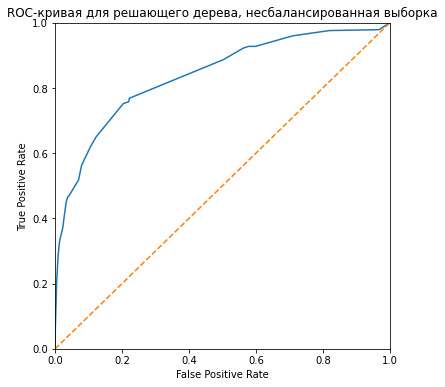

In [26]:
#ROC-кривая для дерева решений
probabilities_valid_tree_unbalanced = best_model_auc_roc_tree_unbalanced_valid.predict_proba(features_valid)
probabilities_one_valid_tree_unbalanced = probabilities_valid_tree_unbalanced[:, 1]

fpr_tree_unbalanced, tpr_tree_unbalanced, thresholds_tree_unbalanced = roc_curve(target_valid, probabilities_one_valid_tree_unbalanced) 

plt.figure(figsize=(6,6))
plt.plot(fpr_tree_unbalanced, tpr_tree_unbalanced)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC-кривая для решающего дерева, несбалансированная выборка")
plt.show()

### Случайный лес

<b>Ответ студента №1</b>

Создадим функцию для построения случайного леса на основе тренировочных данных и выявлении наилучшей модели на валидационной выборке на основе критерия F1, перебирая глубину и количесвто деревьев, а также порог классификации, и AUC-ROC, перебирая глубину дерева и их количество

In [27]:
#RandomForestClassifiier

def forest(features_train,target_train, balance_mark):

    #best_model_f1_forest_train = None
    #best_f1_forest_train = 0
    #best_f1_est_forest_train = 0
    #best_f1_depth_forest_train = 0
    #best_f1_threshold_forest_train = 0

    best_model_f1_forest_valid = None
    best_f1_forest_valid = 0
    best_f1_est_forest_valid = 0
    best_f1_depth_forest_valid = 0
    best_f1_threshold_forest_valid = 0

    #best_model_auc_roc_forest_train = None
    #best_auc_roc_forest_train = 0
    #best_auc_roc_est_forest_train = 0
    #best_auc_roc_depth_forest_train = 0

    best_model_auc_roc_forest_valid = None
    best_auc_roc_forest_valid = 0
    best_auc_roc_est_forest_valid = 0
    best_auc_roc_depth_forest_valid = 0


    numest=200
    numdepth=40
    index_m=0
    index_n=0


    #forest_f1 = pd.DataFrame(index=range(50000), columns =["threshold",'est','depth', 'f1_train','f1_valid'])
    forest_f1 = pd.DataFrame(index=range(50000), columns =["threshold",'est','depth', 'f1_valid'])

    
    #forest_auc_roc = pd.DataFrame(index=range(50000), columns =['est','depth', "auc_roc_train","auc_roc_valid"])
    forest_auc_roc = pd.DataFrame(index=range(50000), columns =['est','depth', "auc_roc_valid"])

    
    for est in range(10, numest+1, 10):
        for depth in range (1, numdepth+1):

            model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight=balance_mark)
            model.fit(features_train, target_train)
        
            probabilities_valid_forest = model.predict_proba(features_valid)
            #probabilities_train_forest = model.predict_proba(features_train)

            probabilities_one_valid_forest = probabilities_valid_forest[:, 1]
            #probabilities_one_train_forest = probabilities_train_forest[:, 1]
            
            auc_roc_valid=roc_auc_score(target_valid, probabilities_one_valid_forest)
            #auc_roc_train=roc_auc_score(target_train, probabilities_one_train_forest)
            
            #forest_auc_roc.at[index_m, "auc_roc_train"]=auc_roc_train
            forest_auc_roc.at[index_m, "auc_roc_valid"]=auc_roc_valid
            forest_auc_roc.at[index_m, "est"]=est
            forest_auc_roc.at[index_m, "depth"]=depth
            
            index_m+=1

            if auc_roc_valid > best_auc_roc_forest_valid:
                    best_model_auc_roc_forest_valid = model
                    best_auc_roc_forest_valid =  auc_roc_valid
                    best_auc_roc_est_forest_valid = est
                    best_auc_roc_depth_forest_valid = depth

              
        
            #if auc_roc_train > best_auc_roc_forest_train:
            #        best_model_auc_roc_forest_train = model
            #        best_auc_roc_forest_train = auc_roc_train
            #        best_auc_roc_est_forest_train = est
            #        best_auc_roc_depth_forest_train =depth

            
            for threshold in np.arange(0, 1.0, 0.02):
                predicted_valid = probabilities_one_valid_forest > threshold
                #predicted_train = probabilities_one_train_forest > threshold
    
                f1_valid=f1_score(target_valid,predicted_valid)
                #f1_train=f1_score(target_train,predicted_train)
    
                forest_f1.at[index_n, "threshold"]=threshold
                #forest_f1.at[index_n, "f1_train"]=f1_train
                forest_f1.at[index_n, "f1_valid"]=f1_valid
                forest_f1.at[index_n, "est"]=est
                forest_f1.at[index_n, "depth"]=depth
                    
                index_n+=1
        
                if f1_valid > best_f1_forest_valid:
                    best_model_f1_forest_valid = model
                    best_f1_forest_valid = f1_valid
                    best_f1_est_forest_valid = est
                    best_f1_depth_forest_valid = depth
                    best_f1_threshold_forest_valid = threshold
                
             
                #if f1_train > best_f1_forest_train:
                #    best_model_f1_forest_train = model
                #    best_f1_forest_train = f1_train
                #    best_f1_est_forest_train = est
                #    best_f1_depth_forest_train = depth
                #    best_f1_threshold_forest_train = threshold

      

    #return best_f1_forest_train, best_f1_threshold_forest_train, best_f1_est_forest_train, best_f1_depth_forest_train, best_auc_roc_forest_train, best_auc_roc_est_forest_train, best_auc_roc_depth_forest_train, best_f1_forest_valid,best_f1_threshold_forest_valid,best_f1_est_forest_valid,best_f1_depth_forest_valid,best_auc_roc_forest_valid,best_auc_roc_est_forest_valid,best_auc_roc_depth_forest_valid,best_model_auc_roc_forest_valid,best_model_auc_roc_forest_train,best_model_f1_forest_valid,best_model_f1_forest_train
    return  best_f1_forest_valid, best_f1_threshold_forest_valid, best_f1_est_forest_valid, best_f1_depth_forest_valid, best_auc_roc_forest_valid, best_auc_roc_est_forest_valid, best_auc_roc_depth_forest_valid, best_model_auc_roc_forest_valid, best_model_f1_forest_valid



<b>Ответ студента №1</b>

Найдем наилучшую модель "случайного леса" для несбалалансированных данных, обученную на тренировочных данных и показавшую наилучший результат на валидационной выборке.

In [28]:
%%time
#unbalanced_forest
balance_mark=None

best_f1_forest_unbalanced_valid, best_f1_threshold_forest_unbalanced_valid, best_f1_est_forest_unbalanced_valid, best_f1_depth_forest_unbalanced_valid, best_auc_roc_forest_unbalanced_valid, best_auc_roc_est_forest_unbalanced_valid, best_auc_roc_depth_forest_unbalanced_valid, best_model_auc_roc_forest_unbalanced_valid, best_model_f1_forest_unbalanced_valid = forest(features_train,target_train, balance_mark)


display("Случайный лес")

#print("\n")
display("Валидационная выборка")                    
display("Максимальный F1:", best_f1_forest_unbalanced_valid,
        "Порог классификации:", best_f1_threshold_forest_unbalanced_valid,
        "Количество деревьев:", best_f1_est_forest_unbalanced_valid,
        "Максимальная глубина:", best_f1_depth_forest_unbalanced_valid)
print("\n")
display("Максимальный AUC-ROC:", best_auc_roc_forest_unbalanced_valid,
        "Количество деревьев:", best_auc_roc_est_forest_unbalanced_valid,
        "Максимальная глубина:", best_auc_roc_depth_forest_unbalanced_valid)

'Случайный лес'

'Валидационная выборка'

'Максимальный F1:'

0.6611570247933884

'Порог классификации:'

0.36

'Количество деревьев:'

100

'Максимальная глубина:'

16

'Максимальный AUC-ROC:'

0.8785739433012255

'Количество деревьев:'

70

'Максимальная глубина:'

7

CPU times: user 59.4 s, sys: 420 ms, total: 59.8 s
Wall time: 59.9 s


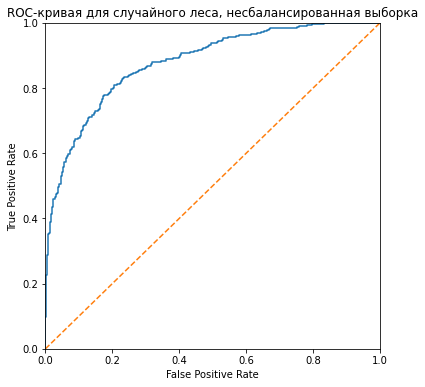

In [29]:
#ROC-кривая
probabilities_valid_forest_unbalanced = best_model_auc_roc_forest_unbalanced_valid.predict_proba(features_valid)
probabilities_one_valid_forest_unbalanced = probabilities_valid_forest_unbalanced[:, 1]

fpr_forest_unbalanced, tpr_forest_unbalanced, thresholds_forest_unbalanced = roc_curve(target_valid, probabilities_one_valid_forest_unbalanced) 

plt.figure(figsize=(6,6))
plt.plot(fpr_forest_unbalanced, tpr_forest_unbalanced)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC-кривая для случайного леса, несбалансированная выборка")
plt.show()

### Логистическая регрессия

<b>Ответ студента №1</b>

Создадим функцию для построения логистической регрессии на основе тренировочных данных и выявлении наилучшей модели на валидационной выборке на основе критерия F1, перебирая порог классификации, и AUC-ROC

In [30]:
#LogisticRegression
def logistic(features_train,target_train, balance_mark):
    best_model_auc_roc_logistic_valid = None
    #best_model_auc_roc_logistic_train = None


    #logistic_f1 = pd.DataFrame(index=range(50), columns =['threshold','f1_train','f1_valid'])
    logistic_f1 = pd.DataFrame(index=range(50), columns =['threshold','f1_valid'])

    index_n=0

    #best_f1_logistic_train = 0
    #best_threshold_f1_logistic_train = 0
    #best_auc_roc_logistic_train = 0

    best_f1_logistic_valid = 0
    best_threshold_f1_logistic_valid = 0
    best_auc_roc_logistic_valid = 0

    model = LogisticRegression(random_state=12345, solver='liblinear', class_weight=balance_mark)
    model.fit(features_train, target_train)

    best_model_auc_roc_logistic_valid=model
    #best_model_auc_roc_logistic_train=model
    best_model_f1_logistic_valid=model
    #best_model_f1_logistic_train=model

    probabilities_valid_logistic = model.predict_proba(features_valid)
    #probabilities_train_logistic = model.predict_proba(features_train)

    probabilities_one_valid_logistic = probabilities_valid_logistic[:, 1]
    #probabilities_one_train_logistic = probabilities_train_logistic[:, 1]

    best_auc_roc_logistic_valid=roc_auc_score(target_valid, probabilities_one_valid_logistic)
    #best_auc_roc_logistic_train=roc_auc_score(target_train, probabilities_one_train_logistic)


    for threshold in np.arange(0, 1.0, 0.02):
        predicted_valid = probabilities_one_valid_logistic > threshold
        #predicted_train = probabilities_one_train_logistic > threshold
    
        f1_valid=f1_score(target_valid,predicted_valid)
        #f1_train=f1_score(target_train,predicted_train)

        logistic_f1.at[index_n, "threshold"]=threshold
        #logistic_f1.at[index_n, "f1_train"]=f1_train
        logistic_f1.at[index_n, "f1_valid"]=f1_valid
    
        index_n+=1
        
        if f1_valid > best_f1_logistic_valid:
            best_f1_logistic_valid = f1_valid
            best_f1_threshold_logistic_valid = threshold
             
        
        #if f1_train > best_f1_logistic_train:
        #    best_f1_logistic_train = f1_train
        #    best_f1_threshold_logistic_train = threshold

    #return best_f1_logistic_train, best_f1_threshold_logistic_train, best_auc_roc_logistic_train, best_f1_logistic_valid, best_f1_threshold_logistic_valid, best_auc_roc_logistic_valid, best_model_auc_roc_logistic_valid, best_model_auc_roc_logistic_train, best_model_f1_logistic_valid, best_model_f1_logistic_train
    return best_f1_logistic_valid, best_f1_threshold_logistic_valid, best_auc_roc_logistic_valid, best_model_auc_roc_logistic_valid, best_model_f1_logistic_valid


<div class="alert alert-info">
<b>Ответ студента №2</b>
    
Угу, наверное лучше сразу при анализе данных выявлять высокоскоррелированные данные, чтобы при построении моделей исключать наличие мультиколлинеарности?
    
Ниже приведу матрицу корреляций для количественных признаков и рассчитаю VIF коэффициент.

In [31]:
display(features_train[col_names].corr())

,CreditScore,Age,Tenure,Balance,EstimatedSalary
CreditScore,1.00,-0.01,0.01,0.01,0.00
Age,-0.01,1.00,-0.01,0.02,-0.02
Tenure,0.01,-0.01,1.00,0.01,0.03
Balance,0.01,0.02,0.01,1.00,-0.00
EstimatedSalary,0.00,-0.02,0.03,-0.00,1.00


In [32]:
y, X = dmatrices('CreditScore ~ Age+Tenure+Balance+EstimatedSalary', data=features_train[col_names], return_type='dataframe')
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
display(vif)

,VIF,variable
0,1.00,Intercept
1,1.00,Age
2,1.00,Tenure
3,1.00,Balance
4,1.00,EstimatedSalary


<div class="alert alert-info">
<b>Ответ студента №2</b>

Коэффициенты корреляции количественных признаков близки к нулю, а VIF=1, указывают, что мультиколлинеарность в нашем примере не является проблемой.

<b>Ответ студента №1</b>

Найдем наилучшую модель "логистической регрессии" для несбалалансированных данных, обученную на тренировочных данных и показавшую наилучший результат на валидационной выборке.

In [33]:
%%time
#unbalanced_logistic
balance_mark=None

#best_f1_logistic_unbalanced_train, best_f1_threshold_logistic_unbalanced_train, best_auc_roc_logistic_unbalanced_train, best_f1_logistic_unbalanced_valid, best_f1_threshold_logistic_unbalanced_valid, best_auc_roc_logistic_unbalanced_valid, best_model_auc_roc_logistic_unbalanced_valid,best_model_auc_roc_logistic_unbalanced_train,best_model_f1_logistic_unbalanced_valid, best_model_f1_logistic_unbalanced_train=logistic(features_train,target_train, balance_mark)
best_f1_logistic_unbalanced_valid, best_f1_threshold_logistic_unbalanced_valid, best_auc_roc_logistic_unbalanced_valid, best_model_auc_roc_logistic_unbalanced_valid, best_model_f1_logistic_unbalanced_valid=logistic(features_train,target_train, balance_mark)


display("Логистическая регресия")
#print("\n")
#display("Тренировочная выборка")                    
#display("Максимальный F1:", best_f1_logistic_unbalanced_train,
#        "Порог классификации:", best_threshold_f1_logistic_unbalanced_train)
#print("\n")
#display("AUC-ROC:", best_auc_roc_logistic_unbalanced_train)
#
#print("\n")
display("Валидационная выборка")                    
display("Максимальный F1:", best_f1_logistic_unbalanced_valid,
        "Порог классификации:", best_f1_threshold_logistic_unbalanced_valid)
print("\n")
display("AUC-ROC:", best_auc_roc_logistic_unbalanced_valid)

'Логистическая регресия'

'Валидационная выборка'

'Максимальный F1:'

0.5923172242874846

'Порог классификации:'

0.3

'AUC-ROC:'

0.8473465875116656

CPU times: user 138 ms, sys: 111 ms, total: 249 ms
Wall time: 246 ms


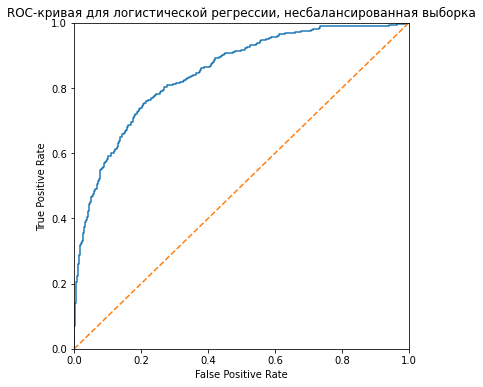

In [34]:
#ROC-кривая, unbalanced
probabilities_valid_logistic_unbalanced = best_model_auc_roc_logistic_unbalanced_valid.predict_proba(features_valid)
probabilities_one_valid_logistic_unbalanced = probabilities_valid_logistic_unbalanced[:, 1]

fpr_logistic_unbalanced, tpr_logistic_unbalanced, thresholds_logistic_unbalanced = roc_curve(target_valid, probabilities_one_valid_logistic_unbalanced) 

plt.figure(figsize=(6,6))
plt.plot(fpr_logistic_unbalanced, tpr_logistic_unbalanced)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC-кривая для логистической регрессии, несбалансированная выборка")
plt.show()

In [35]:
display("Результаты моделей на несбалансированной выборке на валидационных данных")
display(f'Дерево решений. F1: {best_f1_tree_unbalanced_valid:.3f}, порог классификации: {best_f1_threshold_tree_unbalanced_valid:.2f}. AUC-ROC: {best_auc_roc_tree_unbalanced_valid:.3f}')
display(f'Случайный лес. F1: {best_f1_forest_unbalanced_valid:.3f}, порог классификации: {best_f1_threshold_forest_unbalanced_valid:.2f}. AUC-ROC: {best_auc_roc_forest_unbalanced_valid:.3f}')
display(f'Логистическая регрессия. F1: {best_f1_logistic_unbalanced_valid:.3f}, порог классификации: {best_f1_threshold_logistic_unbalanced_valid:.2f}. AUC-ROC: {best_auc_roc_logistic_unbalanced_valid:.3f}')


'Результаты моделей на несбалансированной выборке на валидационных данных'

'Дерево решений. F1: 0.611, порог классификации: 0.26. AUC-ROC: 0.838'

'Случайный лес. F1: 0.661, порог классификации: 0.36. AUC-ROC: 0.879'

'Логистическая регрессия. F1: 0.592, порог классификации: 0.30. AUC-ROC: 0.847'


<b>Ответ студента №1</b>

- все модели на валидационных данных показали себя лучше по сравнению со случайным классификатором - матрика AUC-ROC моделей больше 0.5 
- наилучший результат на основе метрики F1 показала модель случайного леса: F1=0.64. Указанная модель также имеет наибольшее значение критерия AUC-ROC=0.86

## Борьба с дисбалансом


<b>Ответ студента №1</b>

В целях повышения качества обучения моделей и соответсвтенно снижения ошибочной классификации клиентов Банка проведем балансировку выборки. 


<b>Ответ студента №1</b>

Балансировка за счет приведения доли действующих клиентов до уровня ушедших.

In [36]:
#downsampled
features_train_zeros = features_train[target_train == 0]
features_train_ones = features_train[target_train == 1]
target_train_zeros = target_train[target_train == 0]
target_train_ones = target_train[target_train == 1]

fraction=len(target_train[target_train == 1])/len(target_train[target_train == 0])
#display(fraction)

features_train_downsampled = pd.concat([features_train_ones] + [features_train_zeros.sample(frac=fraction, random_state=12345)])
target_train_downsampled = pd.concat([target_train_ones] + [target_train_zeros.sample(frac=fraction, random_state=12345)])
    
features_train_downsampled, target_train_downsampled = shuffle(features_train_downsampled, target_train_downsampled, random_state=12345)

display(len(target_train_downsampled))
display(target_train_downsampled.sum())

2224

1112


<b>Ответ студента №1</b>

Балансировка за счет увеличения доли ушедших клиентов до уровня действующих.

In [37]:
#upsampled
repeat=len(target_train[target_train == 0])/len(target_train[target_train == 1])
#display(repeat)

features_train_upsampled = pd.concat([features_train_ones]*round(repeat) + [features_train_zeros])
target_train_upsampled = pd.concat([target_train_ones]*round(repeat) + [target_train_zeros])
    
features_train_upsampled, target_train_upsampled = shuffle(features_train_upsampled, target_train_upsampled, random_state=12345)

display(len(target_train_upsampled))
display(target_train_upsampled.sum())

8790

4448

### Дерево решений

In [40]:
%%time
#upsampled_tree
balance_mark=None

#best_f1_tree_upsampled_train, best_f1_threshold_tree_upsampled_train, best_f1_depth_tree_upsampled_train, best_auc_roc_tree_upsampled_train, best_auc_roc_depth_tree_upsampled_train,best_f1_tree_upsampled_valid, best_f1_threshold_tree_upsampled_valid, best_f1_depth_tree_upsampled_valid,best_auc_roc_tree_upsampled_valid, best_auc_roc_depth_tree_upsampled_valid, best_model_f1_tree_upsampled_valid, best_model_auc_roc_tree_upsampled_valid=tree(features_train_upsampled, target_train_upsampled, balance_mark)
best_f1_tree_upsampled_valid, best_f1_threshold_tree_upsampled_valid, best_f1_depth_tree_upsampled_valid,best_auc_roc_tree_upsampled_valid, best_auc_roc_depth_tree_upsampled_valid, best_model_f1_tree_upsampled_valid, best_model_auc_roc_tree_upsampled_valid=tree(features_train_upsampled, target_train_upsampled, balance_mark)


display("Решающее дерево")

display("Валидационная выборка")                    
display("Максимальный F1:", best_f1_tree_upsampled_valid,
        "Порог классификации:", best_f1_threshold_tree_upsampled_valid,
        "Максимальная глубина:", best_f1_depth_tree_upsampled_valid)
print("\n")
display("Максимальный AUC-ROC:", best_auc_roc_tree_upsampled_valid,
        "Максимальная глубина для AUC-ROC:", best_auc_roc_depth_tree_upsampled_valid)

'Решающее дерево'

'Валидационная выборка'

'Максимальный F1:'

0.6143790849673203

'Порог классификации:'

0.66

'Максимальная глубина:'

5

'Максимальный AUC-ROC:'

0.8450293105728555

'Максимальная глубина для AUC-ROC:'

5

CPU times: user 1.7 s, sys: 20 ms, total: 1.72 s
Wall time: 1.72 s


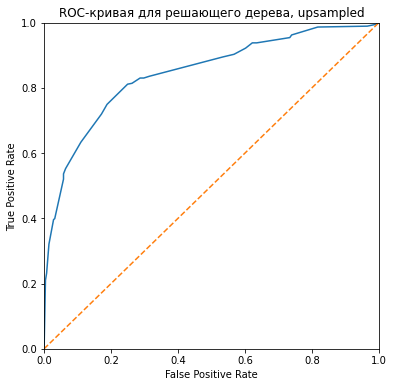

In [41]:
#ROC-кривая, upsampled
probabilities_valid_tree_upsampled = best_model_auc_roc_tree_upsampled_valid.predict_proba(features_valid)
probabilities_one_valid_tree_upsampled = probabilities_valid_tree_upsampled[:, 1]

fpr_tree_upsampled, tpr_tree_upsampled, thresholds_tree_upsampled = roc_curve(target_valid, probabilities_one_valid_tree_upsampled) 

plt.figure(figsize=(6,6))
plt.plot(fpr_tree_upsampled, tpr_tree_upsampled)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC-кривая для решающего дерева, upsampled")
plt.show()


<b>Ответ студента №1</b>

Балансировка данных путем установки соответствующего параметра модели (class_weight=’balanced’)

In [42]:
%%time
#unbalanced_tree
balance_mark='balanced'

#best_f1_tree_balanced_train, best_f1_threshold_tree_balanced_train, best_f1_depth_tree_balanced_train, best_auc_roc_tree_balanced_train, best_auc_roc_depth_tree_balanced_train,best_f1_tree_balanced_valid, best_f1_threshold_tree_balanced_valid, best_f1_depth_tree_balanced_valid,best_auc_roc_tree_balanced_valid, best_auc_roc_depth_tree_balanced_valid, best_model_f1_tree_balanced_valid, best_model_auc_roc_tree_balanced_valid=tree(features_train, target_train, balance_mark)
best_f1_tree_balanced_valid, best_f1_threshold_tree_balanced_valid, best_f1_depth_tree_balanced_valid,best_auc_roc_tree_balanced_valid, best_auc_roc_depth_tree_balanced_valid, best_model_f1_tree_balanced_valid, best_model_auc_roc_tree_balanced_valid=tree(features_train, target_train, balance_mark)

display("Решающее дерево")

display("Валидационная выборка")                    
display("Максимальный F1:", best_f1_tree_balanced_valid,
        "Порог классификации:", best_f1_threshold_tree_balanced_valid,
        "Максимальная глубина:", best_f1_depth_tree_balanced_valid)
print("\n")
display("Максимальный AUC-ROC:", best_auc_roc_tree_balanced_valid,
        "Максимальная глубина для AUC-ROC:", best_auc_roc_depth_tree_balanced_valid)

'Решающее дерево'

'Валидационная выборка'

'Максимальный F1:'

0.6143790849673203

'Порог классификации:'

0.66

'Максимальная глубина:'

5

'Максимальный AUC-ROC:'

0.8450293105728555

'Максимальная глубина для AUC-ROC:'

5

CPU times: user 1.63 s, sys: 11.7 ms, total: 1.64 s
Wall time: 1.65 s


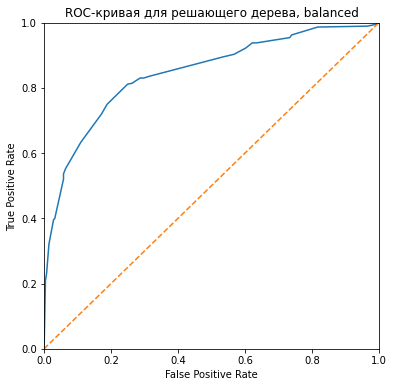

In [43]:
#ROC-кривая, balanced
probabilities_valid_tree_balanced = best_model_auc_roc_tree_balanced_valid.predict_proba(features_valid)
probabilities_one_valid_tree_balanced = probabilities_valid_tree_balanced[:, 1]

fpr_tree_balanced, tpr_tree_balanced, thresholds_tree_balanced = roc_curve(target_valid, probabilities_one_valid_tree_balanced) 

plt.figure(figsize=(6,6))
plt.plot(fpr_tree_balanced, tpr_tree_balanced)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC-кривая для решающего дерева, balanced")
plt.show()

### Случайный лес

In [44]:
%%time
#downsampled_forest
balance_mark=None

#best_f1_forest_downsampled_train, best_f1_threshold_forest_downsampled_train,best_f1_est_forest_downsampled_train, best_f1_depth_forest_downsampled_train,best_auc_roc_forest_downsampled_train, best_auc_roc_est_forest_downsampled_train, best_auc_roc_depth_forest_downsampled_train,best_f1_forest_downsampled_valid,best_f1_threshold_forest_downsampled_valid,best_f1_est_forest_downsampled_valid,best_f1_depth_forest_downsampled_valid,best_auc_roc_forest_downsampled_valid,best_auc_roc_est_forest_downsampled_valid,best_auc_roc_depth_forest_downsampled_valid,best_model_auc_roc_forest_downsampled_valid,best_model_auc_roc_forest_downsampled_train,best_model_f1_forest_downsampled_valid, best_model_f1_forest_downsampled_train=forest(features_train_downsampled, target_train_downsampled, balance_mark)
best_f1_forest_downsampled_valid,best_f1_threshold_forest_downsampled_valid,best_f1_est_forest_downsampled_valid,best_f1_depth_forest_downsampled_valid,best_auc_roc_forest_downsampled_valid,best_auc_roc_est_forest_downsampled_valid,best_auc_roc_depth_forest_downsampled_valid,best_model_auc_roc_forest_downsampled_valid,best_model_f1_forest_downsampled_valid =forest(features_train_downsampled, target_train_downsampled, balance_mark)


display("Случайный лес")

#print("\n")
display("Валидационная выборка")                    
display("Максимальный F1:", best_f1_forest_downsampled_valid,
        "Порог классификации:", best_f1_threshold_forest_downsampled_valid,
        "Количество деревьев:", best_f1_est_forest_downsampled_valid,
        "Максимальная глубина:", best_f1_depth_forest_downsampled_valid)
print("\n")
display("Максимальный AUC-ROC:", best_auc_roc_forest_downsampled_valid,
        "Количество деревьев:", best_auc_roc_est_forest_downsampled_valid,
        "Максимальная глубина:", best_auc_roc_depth_forest_downsampled_valid)

'Случайный лес'

'Валидационная выборка'

'Максимальный F1:'

0.6581306017925737

'Порог классификации:'

0.62

'Количество деревьев:'

70

'Максимальная глубина:'

15

'Максимальный AUC-ROC:'

0.8785180604168491

'Количество деревьев:'

30

'Максимальная глубина:'

8

CPU times: user 41.2 s, sys: 160 ms, total: 41.4 s
Wall time: 41.6 s


In [45]:
%%time
#upsampled_forest
balance_mark=None

#best_f1_forest_upsampled_train, best_f1_threshold_forest_upsampled_train,best_f1_est_forest_upsampled_train, best_f1_depth_forest_upsampled_train,best_auc_roc_forest_upsampled_train, best_auc_roc_est_forest_upsampled_train, best_auc_roc_depth_forest_upsampled_train,best_f1_forest_upsampled_valid,best_f1_threshold_forest_upsampled_valid,best_f1_est_forest_upsampled_valid,best_f1_depth_forest_upsampled_valid,best_auc_roc_forest_upsampled_valid,best_auc_roc_est_forest_upsampled_valid,best_auc_roc_depth_forest_upsampled_valid,best_model_auc_roc_forest_upsampled_valid,best_model_auc_roc_forest_upsampled_train,best_model_f1_forest_upsampled_valid,best_model_f1_forest_upsampled_train=forest(features_train_upsampled,target_train_upsampled, balance_mark)
best_f1_forest_upsampled_valid,best_f1_threshold_forest_upsampled_valid,best_f1_est_forest_upsampled_valid,best_f1_depth_forest_upsampled_valid,best_auc_roc_forest_upsampled_valid,best_auc_roc_est_forest_upsampled_valid,best_auc_roc_depth_forest_upsampled_valid,best_model_auc_roc_forest_upsampled_valid,best_model_f1_forest_upsampled_valid=forest(features_train_upsampled,target_train_upsampled, balance_mark)


display("Случайный лес")

#print("\n")
display("Валидационная выборка")                    
display("Максимальный F1:", best_f1_forest_upsampled_valid,
        "Порог классификации:", best_f1_threshold_forest_upsampled_valid,
        "Количество деревьев:", best_f1_est_forest_upsampled_valid,
        "Максимальная глубина:", best_f1_depth_forest_upsampled_valid)
print("\n")
display("Максимальный AUC-ROC:", best_auc_roc_forest_upsampled_valid,
        "Количество деревьев:", best_auc_roc_est_forest_upsampled_valid,
        "Максимальная глубина:", best_auc_roc_depth_forest_upsampled_valid)

'Случайный лес'

'Валидационная выборка'

'Максимальный F1:'

0.6577181208053692

'Порог классификации:'

0.6

'Количество деревьев:'

20

'Максимальная глубина:'

10

'Максимальный AUC-ROC:'

0.8765696105149234

'Количество деревьев:'

50

'Максимальная глубина:'

7

CPU times: user 1min 15s, sys: 232 ms, total: 1min 15s
Wall time: 1min 16s



<b>Ответ студента №1</b>

Балансировка данных путем установки соответствующего параметра модели (class_weight=’balanced’)

In [46]:
%%time
#unbalanced_forest
balance_mark='balanced'

#best_f1_forest_balanced_train, best_f1_threshold_forest_balanced_train,best_f1_est_forest_balanced_train, best_f1_depth_forest_balanced_train,best_auc_roc_forest_balanced_train, best_auc_roc_est_forest_balanced_train, best_auc_roc_depth_forest_balanced_train,best_f1_forest_balanced_valid,best_f1_threshold_forest_balanced_valid,best_f1_est_forest_balanced_valid,best_f1_depth_forest_balanced_valid,best_auc_roc_forest_balanced_valid,best_auc_roc_est_forest_balanced_valid,best_auc_roc_depth_forest_balanced_valid,best_model_auc_roc_forest_balanced_valid,best_model_auc_roc_forest_balanced_train,best_model_f1_forest_balanced_valid, best_model_f1_forest_balanced_train=forest(features_train,target_train, balance_mark)
best_f1_forest_balanced_valid, best_f1_threshold_forest_balanced_valid, best_f1_est_forest_balanced_valid, best_f1_depth_forest_balanced_valid, best_auc_roc_forest_balanced_valid, best_auc_roc_est_forest_balanced_valid, best_auc_roc_depth_forest_balanced_valid, best_model_auc_roc_forest_balanced_valid,best_model_f1_forest_balanced_valid=forest(features_train,target_train, balance_mark)


display("Случайный лес")

#print("\n")
display("Валидационная выборка")                    
display("Максимальный F1:", best_f1_forest_balanced_valid,
        "Порог классификации:", best_f1_threshold_forest_balanced_valid,
        "Количество деревьев:", best_f1_est_forest_balanced_valid,
        "Максимальная глубина:", best_f1_depth_forest_balanced_valid)
print("\n")
display("Максимальный AUC-ROC:", best_auc_roc_forest_balanced_valid,
        "Количество деревьев:", best_auc_roc_est_forest_balanced_valid,
        "Максимальная глубина:", best_auc_roc_depth_forest_balanced_valid)

'Случайный лес'

'Валидационная выборка'

'Максимальный F1:'

0.6510416666666666

'Порог классификации:'

0.42

'Количество деревьев:'

80

'Максимальная глубина:'

13

'Максимальный AUC-ROC:'

0.8742467452876758

'Количество деревьев:'

60

'Максимальная глубина:'

6

CPU times: user 59.8 s, sys: 232 ms, total: 60 s
Wall time: 1min


### Логистическая регрессия

In [47]:
%%time
#downsampled_logistic
balance_mark=None

#best_f1_logistic_downsampled_train, best_f1_threshold_logistic_downsampled_train,best_auc_roc_logistic_downsampled_train,best_f1_logistic_downsampled_valid, best_f1_threshold_logistic_downsampled_valid,best_auc_roc_logistic_downsampled_valid, best_model_auc_roc_logistic_downsampled_valid,best_model_auc_roc_logistic_downsampled_train,best_model_f1_logistic_downsampled_valid, best_model_f1_logistic_downsampled_train=logistic(features_train_downsampled,target_train_downsampled, balance_mark)
best_f1_logistic_downsampled_valid, best_f1_threshold_logistic_downsampled_valid,best_auc_roc_logistic_downsampled_valid, best_model_auc_roc_logistic_downsampled_valid,best_model_f1_logistic_downsampled_valid=logistic(features_train_downsampled,target_train_downsampled, balance_mark)


display("Логистическая регресия")

display("Валидационная выборка")                    
display("Максимальный F1:", best_f1_logistic_downsampled_valid,
        "Порог классификации:", best_f1_threshold_logistic_downsampled_valid)
print("\n")
display("AUC-ROC:", best_auc_roc_logistic_downsampled_valid)

'Логистическая регресия'

'Валидационная выборка'

'Максимальный F1:'

0.6031746031746031

'Порог классификации:'

0.58

'AUC-ROC:'

0.8488405232873293

CPU times: user 160 ms, sys: 63.9 ms, total: 224 ms
Wall time: 241 ms


In [48]:
%%time
#upsampled_logistic
balance_mark=None

#best_f1_logistic_upsampled_train, best_f1_threshold_logistic_upsampled_train, best_auc_roc_logistic_upsampled_train, best_f1_logistic_upsampled_valid, best_f1_threshold_logistic_upsampled_valid, best_auc_roc_logistic_upsampled_valid, best_model_auc_roc_logistic_upsampled_valid,best_model_auc_roc_logistic_upsampled_train,best_model_f1_logistic_upsampled_valid, best_model_f1_logistic_upsampled_train=logistic(features_train_upsampled,target_train_upsampled, balance_mark)
best_f1_logistic_upsampled_valid, best_f1_threshold_logistic_upsampled_valid, best_auc_roc_logistic_upsampled_valid, best_model_auc_roc_logistic_upsampled_valid, best_model_f1_logistic_upsampled_valid=logistic(features_train_upsampled,target_train_upsampled, balance_mark)


display("Логистическая регресия")

display("Валидационная выборка")                    
display("Максимальный F1:", best_f1_logistic_upsampled_valid,
        "Порог классификации:", best_f1_threshold_logistic_upsampled_valid)
print("\n")
display("AUC-ROC:", best_auc_roc_logistic_upsampled_valid)

'Логистическая регресия'

'Валидационная выборка'

'Максимальный F1:'

0.5985915492957746

'Порог классификации:'

0.6

'AUC-ROC:'

0.8483860091610675

CPU times: user 182 ms, sys: 91.9 ms, total: 274 ms
Wall time: 290 ms



<b>Ответ студента №1</b>

Балансировка данных путем установки соответствующего параметра модели (class_weight=’balanced’)

In [49]:
%%time
#unbalanced_logistic
balance_mark="balanced"

#best_f1_logistic_balanced_train, best_f1_threshold_logistic_balanced_train,best_auc_roc_logistic_balanced_train,best_f1_logistic_balanced_valid, best_f1_threshold_logistic_balanced_valid,best_auc_roc_logistic_balanced_valid, best_model_auc_roc_logistic_balanced_valid,best_model_auc_roc_logistic_balanced_train,best_model_f1_logistic_balanced_valid, best_model_f1_logistic_balanced_train=logistic(features_train,target_train, balance_mark)
best_f1_logistic_balanced_valid, best_f1_threshold_logistic_balanced_valid, best_auc_roc_logistic_balanced_valid, best_model_auc_roc_logistic_balanced_valid,best_model_f1_logistic_balanced_valid=logistic(features_train,target_train, balance_mark)


display("Логистическая регресия")

display("Валидационная выборка")                    
display("Максимальный F1:", best_f1_logistic_balanced_valid,
        "Порог классификации:", best_f1_threshold_logistic_balanced_valid)
print("\n")
display("AUC-ROC:", best_auc_roc_logistic_balanced_valid)

'Логистическая регресия'

'Валидационная выборка'

'Максимальный F1:'

0.5984598459845984

'Порог классификации:'

0.56

'AUC-ROC:'

0.8483357145651287

CPU times: user 171 ms, sys: 112 ms, total: 282 ms
Wall time: 296 ms


In [50]:
#tree
display("Итоги моделей на валидационой выборке")
display(f'Дерево решений (downsampled). F1: {best_f1_tree_downsampled_valid:.3f}, порог классификации: {best_f1_threshold_tree_downsampled_valid:.2f}. AUC-ROC: {best_auc_roc_tree_downsampled_valid:.3f}')
display(f'Дерево решений (upsampled). F1: {best_f1_tree_upsampled_valid:.3f}, порог классификации:  {best_f1_threshold_tree_upsampled_valid:.2f}. AUC-ROC: {best_auc_roc_tree_upsampled_valid:.3f}')
display(f'Дерево решений (balanced). F1: {best_f1_tree_balanced_valid:.3f}, порог классификации: {best_f1_threshold_tree_balanced_valid:.2f}. AUC-ROC: {best_auc_roc_tree_balanced_valid:.3f}')

#forest
display(f'Случайный лес (downsampled). F1: {best_f1_forest_downsampled_valid:.3f}, порог классификации:  {best_f1_threshold_forest_downsampled_valid:.2f}. AUC-ROC: {best_auc_roc_forest_downsampled_valid:.3f}')
display(f'Случайный лес (upsampled). F1: {best_f1_forest_upsampled_valid:.3f}, порог классификации:  {best_f1_threshold_forest_upsampled_valid:.2f}. AUC-ROC: {best_auc_roc_forest_upsampled_valid:.3f}')
display(f'Случайный лес (balanced). F1: {best_f1_forest_balanced_valid:.3f}, порог классификации:  {best_f1_threshold_forest_balanced_valid:.2f}. AUC-ROC: {best_auc_roc_forest_balanced_valid:.3f}')

#logistic
display(f'Логистическая регессия (downsampled). F1: {best_f1_logistic_downsampled_valid:.3f}, порог классификации:  {best_f1_threshold_logistic_downsampled_valid:.2f}. AUC-ROC: {best_auc_roc_logistic_downsampled_valid:.3f}')
display(f'Логистическая регессия (upsampled). F1: {best_f1_logistic_upsampled_valid:.3f}, порог классификации:  {best_f1_threshold_logistic_upsampled_valid:.2f}. AUC-ROC: {best_auc_roc_logistic_upsampled_valid:.3f}')
display(f'Логистическая регессия (balanced). F1: {best_f1_logistic_balanced_valid:.3f}, порог классификации:  {best_f1_threshold_logistic_balanced_valid:.2f}. AUC-ROC: {best_auc_roc_logistic_balanced_valid:.3f}')

'Итоги моделей на валидационой выборке'

'Дерево решений (downsampled). F1: 0.604, порог классификации: 0.68. AUC-ROC: 0.840'

'Дерево решений (upsampled). F1: 0.614, порог классификации:  0.66. AUC-ROC: 0.845'

'Дерево решений (balanced). F1: 0.614, порог классификации: 0.66. AUC-ROC: 0.845'

'Случайный лес (downsampled). F1: 0.658, порог классификации:  0.62. AUC-ROC: 0.879'

'Случайный лес (upsampled). F1: 0.658, порог классификации:  0.60. AUC-ROC: 0.877'

'Случайный лес (balanced). F1: 0.651, порог классификации:  0.42. AUC-ROC: 0.874'

'Логистическая регессия (downsampled). F1: 0.603, порог классификации:  0.58. AUC-ROC: 0.849'

'Логистическая регессия (upsampled). F1: 0.599, порог классификации:  0.60. AUC-ROC: 0.848'

'Логистическая регессия (balanced). F1: 0.598, порог классификации:  0.56. AUC-ROC: 0.848'


<b>Ответ студента №1</b>

Как и на несбалансированных данных модель случайного леса на всех сбалансированных данных показала наилучшие результаты F1=0.65-0.66, AUC-ROC=0.87-0.88.   

Все модели на валидационных данных показали себя лучше по сравнению со случайным классификатором - метрика AUC-ROC моделей больше 0.5 


## Тестирование модели


<b>Ответ студента №1</b>

Проведем тестирование всех моделей, нуилучшим образом себя показавших на валидационной выборке, построенные как на сбалансированных данных, так и на несбалансированных.

<div class="alert alert-info">
<b>Ответ студента №2</b>

Среди всех моделей на сбалансировнной (downsample) валидационной выборке показала модель случайного леса. Указанной модель имала наибольший критерий F1=0.658 и AUC-ROC=0,879. Проверим работу указанной модели на тестовой выборке. 

In [51]:
def f1_test(model, threshold):
    probabilities_test = model.predict_proba(features_test)
    probabilities_one_test = probabilities_test[:, 1]
    predicted_test = probabilities_one_test > threshold
    f1_test=f1_score(target_test,predicted_test)
    auc_roc_test=roc_auc_score(target_test,probabilities_one_test)
    
    return f1_test, auc_roc_test

In [52]:
display("Итоги работы моделей на тестовой выборке")
#f1_test_tree_unbalanced, auc_roc_test_f1_tree_unbalanced=f1_test(best_model_f1_tree_unbalanced_valid, best_f1_threshold_tree_unbalanced_valid)
#display(f'Дерево решений (unbalanced): F1: {f1_test_tree_unbalanced:.2f}, AUC-ROC: {auc_roc_test_f1_tree_unbalanced:.2f}')

#f1_test_tree_downsampled, auc_roc_test_f1_tree_downsampled=f1_test(best_model_f1_tree_downsampled_valid, best_f1_threshold_tree_downsampled_valid)
#display(f'Дерево решений (downsampled): F1: {f1_test_tree_downsampled:.2f}, AUC-ROC: {auc_roc_test_f1_tree_downsampled:.2f}')

#f1_test_tree_upsampled, auc_roc_test_f1_tree_upsampled=f1_test(best_model_f1_tree_upsampled_valid, best_f1_threshold_tree_upsampled_valid)
#display(f'Дерево решений (upsampled): F1: {f1_test_tree_upsampled:.2f}, AUC-ROC: {auc_roc_test_f1_tree_upsampled:.2f}')

#f1_test_tree_balanced, auc_roc_test_f1_tree_balanced=f1_test(best_model_f1_tree_balanced_valid, best_f1_threshold_tree_balanced_valid)
#display(f'Дерево решений (balanced): F1: {f1_test_tree_balanced:.2f}, AUC-ROC: {auc_roc_test_f1_tree_balanced:.2f}')

#f1_test_forest_unbalanced, auc_roc_test_f1_forest_unbalanced=f1_test(best_model_f1_forest_unbalanced_valid, best_f1_threshold_forest_unbalanced_valid)
#display(f'Случайный лес (unbalanced): F1: {f1_test_forest_unbalanced:.2f}, AUC-ROC: {auc_roc_test_f1_forest_unbalanced:.2f}')

f1_test_forest_downsampled, auc_roc_test_f1_forest_downsampled=f1_test(best_model_f1_forest_downsampled_valid, best_f1_threshold_forest_downsampled_valid)
display(f'Случайный лес (downsampled): F1: {f1_test_forest_downsampled:.3f}, порог класификации {best_f1_threshold_forest_downsampled_valid:.2f}, AUC-ROC: {auc_roc_test_f1_forest_downsampled:.3f}')

#f1_test_forest_upsampled, auc_roc_test_f1_forest_upsampled=f1_test(best_model_f1_forest_upsampled_valid, best_f1_threshold_forest_upsampled_valid)
#display(f'Случайный лес (upsampled): F1: {f1_test_forest_upsampled:.2f}, AUC-ROC: {auc_roc_test_f1_forest_upsampled:.2f}')

#f1_test_forest_balanced, auc_roc_test_f1_forest_balanced=f1_test(best_model_f1_forest_balanced_valid, best_f1_threshold_forest_balanced_valid)
#display(f'Случайный лес (balanced): F1: {f1_test_forest_balanced:.2f}, AUC-ROC: {auc_roc_test_f1_forest_balanced:.2f}')

#f1_test_logistic_unbalanced, auc_roc_test_f1_logistic_unbalanced=f1_test(best_model_f1_logistic_unbalanced_valid, best_f1_threshold_logistic_unbalanced_valid)
#display(f'Логистическая регрессия (unbalanced): F1: {f1_test_logistic_unbalanced:.2f}, AUC-ROC: {auc_roc_test_f1_logistic_unbalanced:.2f}')

#f1_test_logistic_downsampled, auc_roc_test_f1_logistic_downsampled=f1_test(best_model_f1_logistic_downsampled_valid, best_f1_threshold_logistic_downsampled_valid)
#display(f'Логистическая регрессия (downsampled): F1: {f1_test_logistic_downsampled:.2f}, AUC-ROC: {auc_roc_test_f1_logistic_downsampled:.2f}')

#f1_test_logistic_upsampled, auc_roc_test_f1_logistic_upsampled=f1_test(best_model_f1_logistic_upsampled_valid, best_f1_threshold_logistic_upsampled_valid)
#display(f'Логистическая регрессия (upsampled): F1: {f1_test_logistic_upsampled:.2f}, AUC-ROC: {auc_roc_test_f1_logistic_upsampled:.2f}')

#f1_test_logistic_balanced, auc_roc_test_f1_logistic_balanced=f1_test(best_model_f1_logistic_balanced_valid, best_f1_threshold_logistic_balanced_valid)
#display(f'Логистическая регрессия (balanced): F1: {f1_test_logistic_balanced:.2f}, AUC-ROC: {auc_roc_test_f1_logistic_balanced:.2f}')



'Итоги работы моделей на тестовой выборке'

'Случайный лес (downsampled): F1: 0.594, порог класификации 0.62, AUC-ROC: 0.844'

<div class="alert alert-info">
<b>Ответ студента №2</b>

ROC-кривая для тестовой выборки для наилучшей модели случайного леса, оцененного на валидационной выборке 

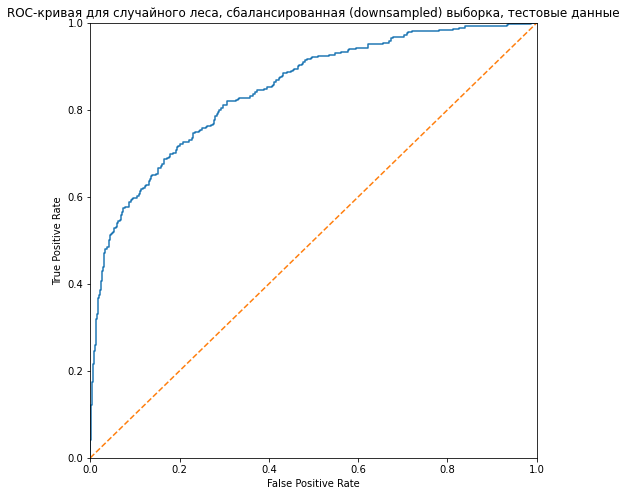

In [53]:
#ROC-кривая
probabilities_test_forest_downsampled = best_model_auc_roc_forest_downsampled_valid.predict_proba(features_test)
probabilities_one_test_forest_downsampled = probabilities_test_forest_downsampled[:, 1]

fpr_forest_downsampled_test, tpr_forest_downsampled_test, thresholds_forest_downsampled_test = roc_curve(target_test, probabilities_one_test_forest_downsampled) 

plt.figure(figsize=(8,8))
plt.plot(fpr_forest_downsampled_test, tpr_forest_downsampled_test)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
#plt.text(fpr_forest_downsampled_test, tpr_forest_downsampled_test,thresholds_forest_downsampled_test)

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC-кривая для случайного леса, сбалансированная (downsampled) выборка, тестовые данные")

plt.show()


<b>Ответ студента №1</b>
    
Результаты моделей, полученные на тестовой выборке, достаточно близски с результатми, полученными на валидационной выборке, что свидетельствует об отсутствии факта переобучения моделей. Модели также лучше себя показали по сравнению со случайным классификатором AUC-ROC>0.5

Тем не менее заданный порог в F1>=0.59 преодолела только модель случайного леса, AUC-ROC=0.87.

Следует отметить, что обучение модели наиболее трудозатраное и требует значительно большего количества времени на подбор наилучших параметров модели.
    
Таким образом, можно рекомендовать использовать обученную модель случайного леса для оценки вероятности ухода клиента.

<div class="alert alert-info">
<b>Ответ студента №2</b>

На тестовой выборке модель случайного леса, оцененная на несбалансированных данных, показала F1=0,594 и AUC-ROC=0,844.

<div class="alert alert-info">
<b>Ответ студента №2</b>

Значение AUC-ROC значительно превышает 0,5. Этот говорит о том, что модель делает значительно более точную классификацию клиентов Банка по сравнению со случайной классификацией.
    
При пороге классификации 0.59 происходит перелом роста TPR, при котором FPR начинает расти быстрее, чем TPR (в этой точке к ROC-кривой можно провести касательную, параллельная прямой TPR=FPR).

<div class="alert alert-info">
<b>Общий вывод. Ответ студента №2</b>

Цель исследования заключалась в построении наилучшей с точки зрения меры F1 модели классификации "поведения" клиентов Банка.
Выборка клиентов Банка состояла из 10000 записей, каждая из которых характеризовалась 14 параметрами. 
Проведена предварительная обработка данных в результате которой 
- исключены данные о клиентах с отсутствующим сроком обслуживания в банке (981 запись)
- данные с полом клиента преобразованы в один dummy ряд 
- для количества используемых клиентами продуктов создано 3 отдельных dummy ряда
- для страны проживания клиента создано 2 отдельных dummy ряда
- исключены такие параметры как номера строк, фамилии и уникальные идентификационные номера клиентов, которые не могут оказать влияния на вероятность ухода клиента

Действующих клиентов примерно в 4 раза больше ушедших - таким образом данные несбалансированы и это было учтено при построении моделей классификации. 

Особенности, выявленные при анализе параметров, которые можно использовать при проведении маркетинговых мероприятий:
- клиенты Банка несбалансированы по полу - мужчин-клиентов больше, чем женщин. Доля ушедших клиентов женщин, больше чем мужчин (25% vs 16%)
- наибольшая доля среди клиентов, покинувших Банк - граждане Германии (32%)
- Банк преимущественно покидали неактивные клиенты и клиенты с низким кредитным рейтингом (ниже 400) 
- аномально выглядит доля клиентов, как текущих так и ушедших, с рейтингом, превышающим 850
- доля ушедших клиентов, имевших средний баланс, превышает долю действующих клиентов со средним балансом
- доля действующих клиентов с нулевым балансом примерно в 1,5 раза больше, чем у ушедших

Для проведения исследования данные были разделены на обучающие, валидационные и тестовые наборы, а также стратифицированы по целевому признаку.

Данные о кредитном рейтинге, возрасте клиента, сроке обслуживания в Банке, балансе и оценке зарплаты были масштабированы. Обучение масштабирования проведено на тренировочной выборке и применено к тренировочной, валидационной и тестовой выборкам.

Коэффициенты корреляции количественных признаков близки к нулю, а VIF=1, указывают, что мультиколлинеарность в нашем примере не является проблемой.

На несбалансированных данных на тренировочной выборке были обучены три типа моделей: «дерева решений», «случайного леса» и «логистической регрессии». Наилучшие параметры моделей определялись на валидационных данных. Все модели на валидационных данных показали себя лучше по сравнению со случайным классификатором - метрика AUC-ROC моделей больше 0.5, наилучший результат на основе метрики F1 показала модель случайного леса: F1=0.661. Указанная модель также имеет наибольшее значение критерия AUC-ROC=0.879.

В целях повышения качества обучения моделей и соответственно снижения ошибочной классификации клиентов Банка была проведена балансировка выборки путем downsample, upsample и путем установки соответствующего параметра взвешивания в самой модели. Как и на несбалансированных данных модель «случайного леса» на всех сбалансированных данных показала наилучшие результаты F1=0.65-0.66, AUC-ROC=0.87-0.88. Все модели на валидационных данных показали себя лучше по сравнению со случайным классификатором - метрика AUC-ROC моделей больше 0.5.

С учетом проведенного тестирования моделей на сбалансированных и несбалансированных валиационных данных считаю целесообразным рекомендовать использовать модель «случайного леса», обученной на сбалансированной (downsample) тренировочной выборке и показавшей наилучшие результаты на валидационной выборке. Работа указанной модели была проверена на тестовой выборке. На тестовой выборке модель показала F1=0,594 и AUC-ROC=0,844. По сравнению с результатами на валидационных данных модель продемонстрировала некоторое переобучение. Значение AUC-ROC говорит о том, что модель делает значительно более точную классификацию клиентов Банка по сравнению со случайной классификацией.
При пороге классификации 0.59 происходит перелом роста TPR, при котором FPR начинает расти быстрее, чем TPR (в этой точке к ROC-кривой можно провести касательную, параллельная прямой TPR=FPR).

<div class="alert alert-info">
<b>Ответ студента №2</b>
    
Евгений, благодарю Вас за ревью и столь полезные ссылки на материалы.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: задача исследована
    - [ ]  Исследован баланс классов
    - [ ]  Изучены модели без учёта дисбаланса
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 3: учтён дисбаланс
    - [ ]  Применено несколько способов борьбы с дисбалансом
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 4: проведено тестирование
- [ ]  Удалось достичь *F1*-меры не менее 0.59
- [ ]  Исследована метрика *AUC-ROC*